# Food Demand Prediction Model

This model is created for predict the food demand of a particular resturant using kaggle dataset.

In [1]:
#first import the libraries

import pandas as pd 
import numpy as np

In [2]:
#import the first dataset. This is the train dataset. This data set is used to train the model. The target column is the number of orders
train_data= pd.read_csv("D:/Fourth semester/AI/Food_demand_project/train.csv")


In [3]:
#read first five lines
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
#import the test data set. This dataset can be used to test the data. In this datased we dont have the number of orders and we can test in this dataset.
test_data = pd.read_csv("D:/Fourth semester/AI/Food_demand_project/test.csv")

#read the first few lines
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
#get basic understanding about the training datset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [6]:
#read the other two datasets. These data sets have the data about the center and the meal. For prediction we usually need the type not the id. 
meal_info= pd.read_csv("D:/Fourth semester/AI/Food_demand_project/meal_info.csv")
fulfilment_center_info = pd.read_csv("D:/Fourth semester/AI/Food_demand_project/fulfilment_center_info.csv")

meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
#Lets connect these two tables and create a meaning ful train data set

In [9]:
train_data_final = pd.merge(train_data, meal_info, on="meal_id", how="outer")
train_data_final = pd.merge(train_data_final, fulfilment_center_info, on="center_id", how="outer")
train_data_final.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


The center_id or meal_id does not have any impact on the prediction . so lets drop that

In [10]:
train_data_final = train_data_final.drop(['center_id', 'meal_id'], axis=1)
train_data_final.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Lets reorder the table column order . Ususally the target column should be in the last

In [11]:
# get the column headings into a list

In [12]:
cols = train_data_final.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [13]:
# change the order and send the target column into the end
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [14]:
# New train data set
train_data_final = train_data_final[cols]
train_data_final.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,TYPE_C,2.0,Beverages,Thai,136.83,152.29,0,0,177
1,1018704,2,647,56,TYPE_C,2.0,Beverages,Thai,135.83,152.29,0,0,323
2,1196273,3,647,56,TYPE_C,2.0,Beverages,Thai,132.92,133.92,0,0,96
3,1116527,4,647,56,TYPE_C,2.0,Beverages,Thai,135.86,134.86,0,0,163
4,1343872,5,647,56,TYPE_C,2.0,Beverages,Thai,146.50,147.50,0,0,215


In [15]:
train_data_final.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [16]:
# According to the data types there are some categorical data columns. So we need to convert them in to numerical data as many model requires numerical data.
# We are going to convert "center_type" , "category" , "cuisine" into the numerical data type

In [17]:
# identify how many categories in each columns we need to convert

center_type_column = "center_type"  
category_column = "category"
cuisine_column = "cuisine"

# Count the number of unique categories in the specified column
center_type_count = train_data_final[center_type_column].nunique()
category_count = train_data_final[category_column].nunique()
cuisine_count = train_data_final[cuisine_column].nunique()

print(f"Number of unique categories in center_type : {center_type_count}")
print(f"Number of unique categories in category : {category_count}")
print(f"Number of unique categories in cuisine : {cuisine_count}")

Number of unique categories in center_type : 3
Number of unique categories in category : 14
Number of unique categories in cuisine : 4


As we can see there are many types on categories. So we can use binary encoding fo that column and for others we can use one-hot encoding

In [18]:
!pip install category_encoders

In [19]:
print(train_data_final[['category', 'center_type', 'cuisine']].isnull().sum())

category       0
center_type    0
cuisine        0
dtype: int64


In [20]:
import category_encoders as ce
# Binary encoding for the 'category' column
binary_encoder = ce.BinaryEncoder(cols=['category'])
train_data_final = binary_encoder.fit_transform(train_data_final)

# One-hot encoding for the 'center_type' and 'cuisine' columns
train_data_final = pd.get_dummies(train_data_final, columns=['center_type', 'cuisine'])

# Convert boolean columns to 1 and 0
train_data_final = train_data_final.astype(int)

# View the transformed data
print(train_data_final.head())

        id  week  city_code  region_code  op_area  category_0  category_1  \
0  1379560     1        647           56        2           0           0   
1  1018704     2        647           56        2           0           0   
2  1196273     3        647           56        2           0           0   
3  1116527     4        647           56        2           0           0   
4  1343872     5        647           56        2           0           0   

   category_2  category_3  checkout_price  ...  emailer_for_promotion  \
0           0           1             136  ...                      0   
1           0           1             135  ...                      0   
2           0           1             132  ...                      0   
3           0           1             135  ...                      0   
4           0           1             146  ...                      0   

   homepage_featured  num_orders  center_type_TYPE_A  center_type_TYPE_B  \
0                  0  

In [21]:
train_data_final.to_csv("D:/Fourth semester/AI/Food_demand_project/encodedData.csv", index=False)

In [22]:
train_data_final.dtypes

id                       int32
week                     int32
city_code                int32
region_code              int32
op_area                  int32
category_0               int32
category_1               int32
category_2               int32
category_3               int32
checkout_price           int32
base_price               int32
emailer_for_promotion    int32
homepage_featured        int32
num_orders               int32
center_type_TYPE_A       int32
center_type_TYPE_B       int32
center_type_TYPE_C       int32
cuisine_Continental      int32
cuisine_Indian           int32
cuisine_Italian          int32
cuisine_Thai             int32
dtype: object

# ANALYSING THE DATASET

In [24]:
#how many records are there in the table?
train_data_final.shape

(456548, 21)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


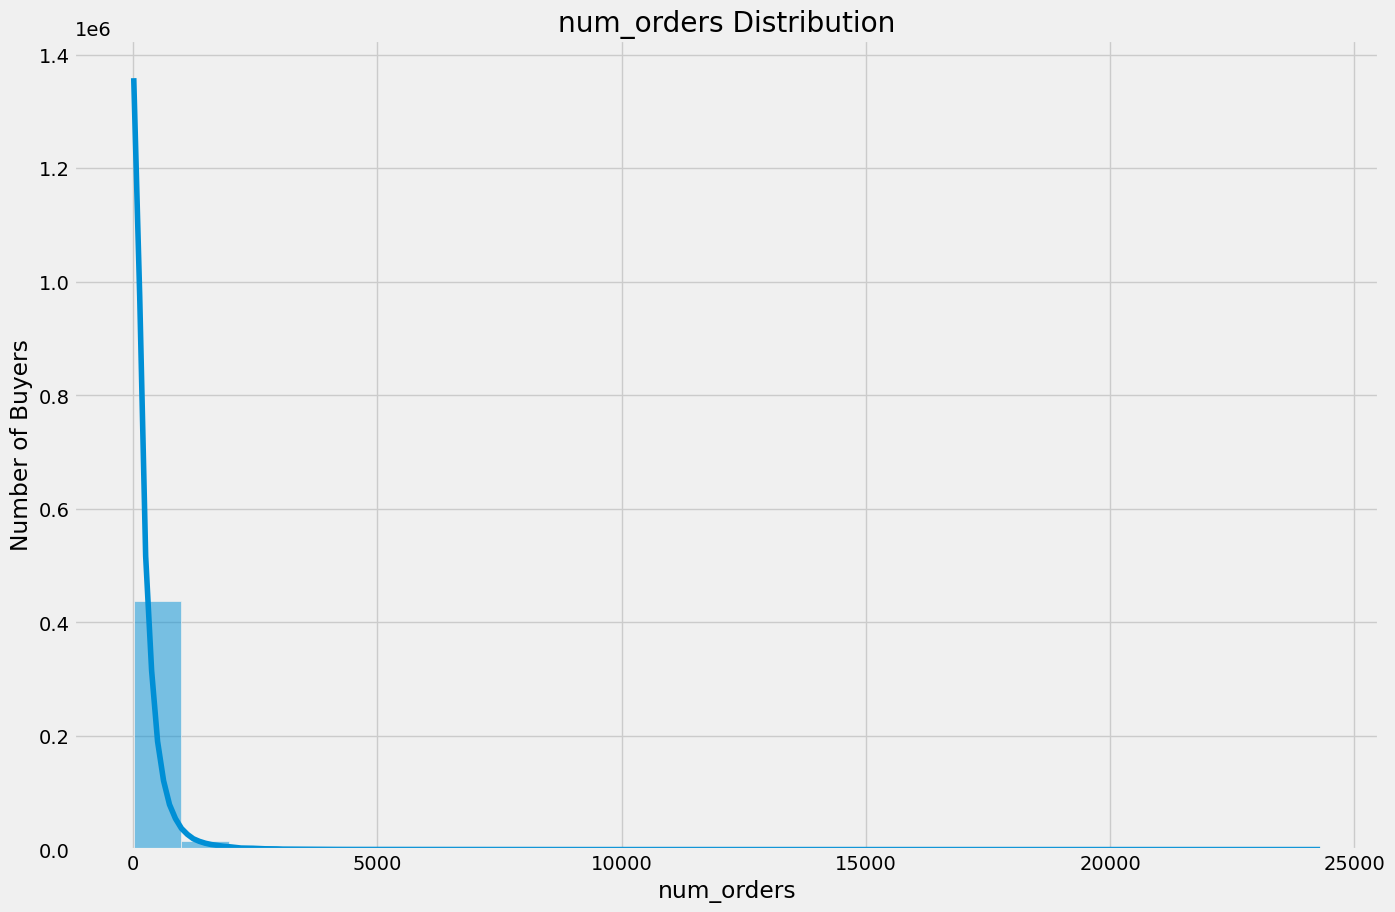

In [25]:
#let's create a plot to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))

# Updated distplot to histplot
sns.histplot(train_data_final.num_orders, bins=25, kde=True)

plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")
plt.show()

We can see that this distribution is not normal. Most of the customers are putting in a small number of orders. It is skewed. It is better to have a normal distribution. Then, we can reduce the impact of outliers. Let's apply logarithmic transformation to the data set

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adding 1 to avoid log(0), which is undefined
train_data_final['log_num_orders'] = np.log1p(train_data_final['num_orders'])

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


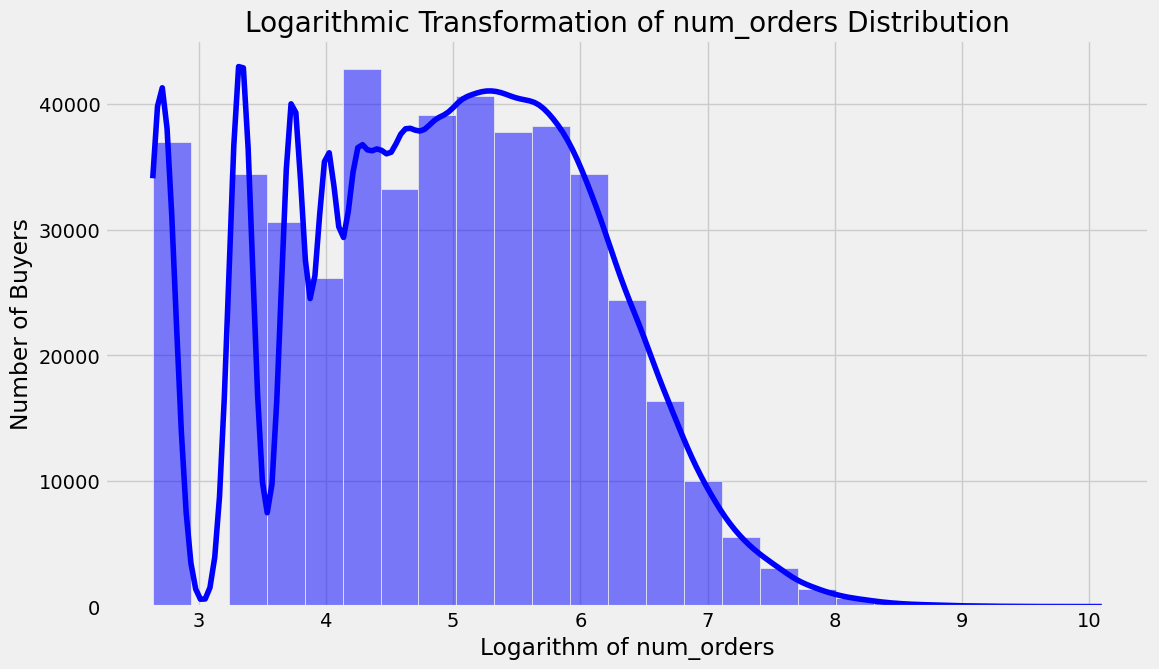

In [27]:
# Plotting the distribution of the transformed data
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.histplot(train_data_final['log_num_orders'], bins=25, kde=True, color='blue')
plt.xlabel("Logarithm of num_orders")
plt.ylabel("Number of Buyers")
plt.title("Logarithmic Transformation of num_orders Distribution")
plt.show()

The original data set was mostly left skewed, but the logarithmic transformation has made it more symmetric.

The transformation compresses large values into a smaller range while maintaining the order of the data. This ensures that outliers (e.g: extremely high-demand days) don't disproportionately influence the model.

Many machine learning models (e.g., linear regression, decision trees) perform better with normally distributed or close to symmetric features.

In [47]:
# Isolate the range contributing to a spike (e.g., between log values 3 and 4)
spike_data = train_data_final[(train_data_final['log_num_orders'] >= 3) & (train_data_final['log_num_orders'] < 4)]
print(spike_data)
spike_data.to_csv('D:/Fourth semester/AI/Food_demand_project/spike_data.csv', index=False)

             id  week  city_code  region_code  op_area  category_0  \
127     1428492   128        647           56        2           0   
206     1016680    62        647           56        2           0   
399     1010925   111        647           56        2           0   
448     1139957    24        647           56        2           0   
449     1309265    26        647           56        2           0   
...         ...   ...        ...          ...      ...         ...   
456539  1166111   137        473           77        4           1   
456544  1060716   142        473           77        4           1   
456545  1029231   143        473           77        4           1   
456546  1141147   144        473           77        4           1   
456547  1443704   145        473           77        4           1   

        category_1  category_2  category_3  checkout_price  ...  \
127              0           0           1             152  ...   
206              0       

# FEATURE ENGINEERING

Lets use correlation matrix to find the most correlated columns to the target variable num_of_orders. We are going to use pearson correlation.

Pearson correlation measures the linear relationship between two variables. The result is a matrix where each element represents the correlation between two features.

The result of these lines is that you will have a list of the 8 most relevant features (besides num_orders) that show the strongest correlation with num_orders in your dataset. 

In [33]:
train_data_final_2 = train_data_final.drop(['id'], axis=1)
correlation = train_data_final_2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'log_num_orders', 'homepage_featured',
       'emailer_for_promotion', 'op_area', 'cuisine_Italian',
       'center_type_TYPE_B', 'city_code'],
      dtype='object')

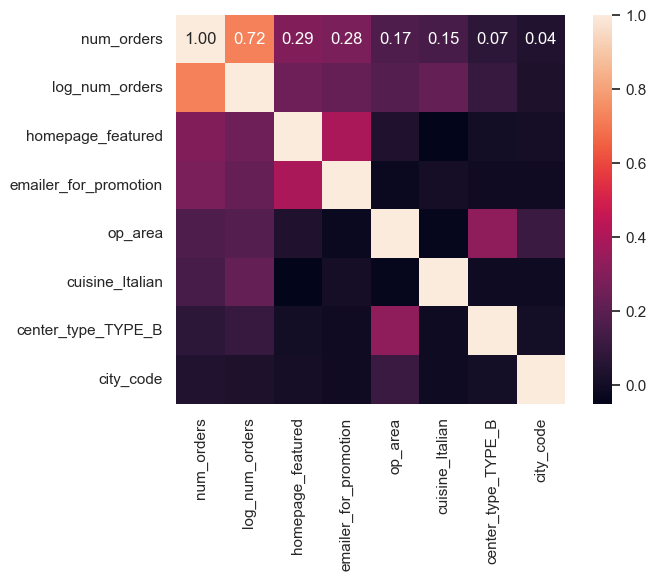

In [34]:
correlation_map = np.corrcoef(train_data_final_2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Remove Highly Correlated Features:

Since num_orders and log_num_orders are highly correlated, we consider removing one of them. Generally, log_num_orders is preferred when we have a skewed distribution of num_orders. we drop num_orders and keep log_num_orders to handle the skewness better.

In [35]:
train_data_final_2 = train_data_final_2.drop('num_orders', axis=1)

# ALGORITHM TEST

In this part let's identify the most suitable model to train this data set. So i am going to evaluate the 

In [36]:
# Drop BOTH 'num_orders' and 'log_num_orders' from features
features = columns.drop(['num_orders', 'log_num_orders'])

# Select features and target variable
train_data_final_3 = train_data_final_2[features]
X = train_data_final_3.values  # Features (independent variables)
y = train_data_final_2['log_num_orders'].values  # Target (dependent variable)

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)


Feature selection: Dropped the columns num_orders and log_num_orders because they are highly correlated with each other and could cause issues in the model.

Data preparation:Extracted the selected features and the target variable (log_num_orders) from your dataset and assigned them to X (features) and y (target).

Data splitting: Split the data into a training set and a validation set, where 75% of the data will be used to train the model, and 25% will be used to evaluate the model's performance.

In [84]:
# These are the mostly correlated valued i have identified for this model
train_data_final_3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine_Italian,center_type_TYPE_B,city_code
0,0,0,2,0,0,647
1,0,0,2,0,0,647
2,0,0,2,0,0,647
3,0,0,2,0,0,647
4,0,0,2,0,0,647


In [75]:
!pip install lightgbm

In [74]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- --------------------------- 29.4/101.7 MB 437.6 kB/s eta 0:02:46
   ----------- -------------------------

In [76]:
# Define RMSLE function
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))

# Create custom scorer for RMSLE
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Split the data into training and validation sets (you need to define X and y beforehand)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # L2 regularization
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, verbose=0, random_state=42),
    'Polynomial Regression': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Store cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = cross_val_score(model, X, y, cv=5, scoring=rmsle_scorer)
    cv_results[model_name] = np.mean(scores)  # Store mean RMSLE value

# Display cross-validation results
print("\nCross-validation results:")
for model_name, mean_rmsle in cv_results.items():
    print(f'{model_name}: Mean RMSLE = {mean_rmsle:.4f}')

Evaluating Linear Regression...
Evaluating Ridge Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating XGBoost...
Evaluating LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 365238, number of used features: 6
[LightGBM] [Info] Start training from score 4.859091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In your results, RMSLE values are negative, and typically, less negative values are better (closer to zero).
Linear Regression (-0.1978) is the best performing model in this case.
K-Nearest Neighbors (-0.3006) performs the worst

# TUNING BEST MODEL (Linear Regression)

In [64]:
# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict on the validation set
y_pred = linear_model.predict(X_val)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

# RMSLE (using your custom function)
rmsle_val = rmsle(y_val, y_pred)

# RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred))

# R² score
r2_val = r2_score(y_val, y_pred)

print(f"RMSLE: {rmsle_val:.4f}")
print(f"RMSE: {rmse_val:.4f}")
print(f"R²: {r2_val:.4f}")

RMSLE: 0.1965
RMSE: 1.0913
R²: 0.1720


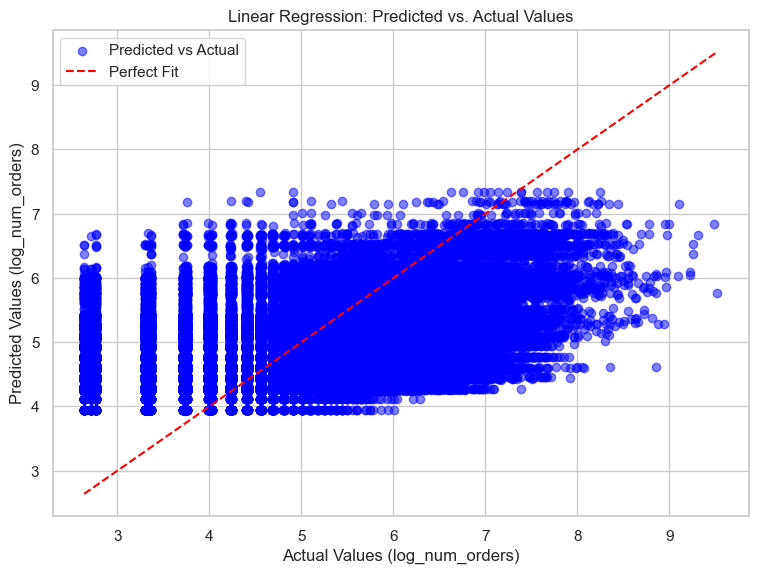

In [67]:
# Plot Predicted vs. Actual values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
plt.scatter(y_val, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--', label="Perfect Fit")  # Perfect Fit Line
plt.xlabel("Actual Values (log_num_orders)")
plt.ylabel("Predicted Values (log_num_orders)")
plt.title("Linear Regression: Predicted vs. Actual Values")
plt.legend()
plt.show()


Polynomial Regression RMSLE: 0.1954


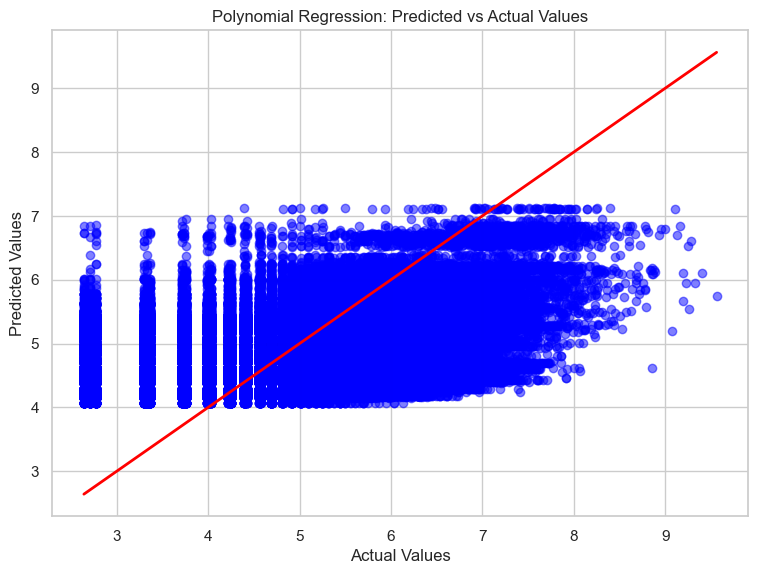

In [77]:
# Polynomial Regression: Transform features
poly = PolynomialFeatures(degree=3)  # Degree can be adjusted
X_poly = poly.fit_transform(X_train)

# Create a Linear Regression model
poly_model = LinearRegression()

# Fit the model
poly_model.fit(X_poly, y_train)

# Predict using the Polynomial model
X_val_poly = poly.transform(X_val)  # Transform validation data
y_pred = poly_model.predict(X_val_poly)

# Calculate RMSLE for evaluation
print(f'Polynomial Regression RMSLE: {rmsle(y_val, y_pred):.4f}')

# Plot the results
plt.figure(figsize=(8,6))

# Plot actual vs predicted values
plt.scatter(y_val, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', lw=2)  # Diagonal line
plt.title('Polynomial Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [85]:
import joblib

# Save the PolynomialFeatures transformer and the trained model
joblib.dump(poly, 'D:/Fourth semester/AI/Food_demand_project/poly_transformer.pkl')  # Save the transformer
joblib.dump(poly_model, 'D:/Fourth semester/AI/Food_demand_project/poly_model.pkl')  # Save the model

['D:/Fourth semester/AI/Food_demand_project/poly_model.pkl']